To view a fully interactive version of this tutorial, [download it](https://gitlab.obspm.fr/babusiaux/GaiaTutorial/blob/master/Tutorial_MeanDistance.ipynb) and open it with your [Jupyter Notebook local server](http://jupyter.readthedocs.io/en/latest/index.html).

# Distance of a stellar group

let's set a stellar group of 1000 stars located at 3 kpc with Gaia typical errors

In [2]:
popdist <- 3.0 
N <- 1000
mags <- seq(18,20,length.out=N)
getSigPi <- function(G,VmI) { # in mas
  z <- sapply(G, function(G) { max(10**(0.4*(12.09-15)),10**(0.4*(G-15)))})
  sigpi <- (-1.631+680.766*z+32.732*z*z)**0.5 * (0.986+(1-0.986)*VmI)/1000
  return(sigpi)
}
parallax_error <- getSigPi(mags,1.0)

let's add a few stars with larger errors

In [3]:
starswithissues <- sample(1:N,50)
parallax_error[starswithissues] <- parallax_error[starswithissues]*2

now compute their observed parallaxes

In [4]:
parallax <- rnorm(N,1/popdist,parallax_error)

### 1. Through individual distances

The wrong way to try to estimate the group distance is by averaging individual distances

In [5]:
distance_indiv <- 1/parallax
cat("Mean of the inverse parallax",mean(distance_indiv),"+/-",sd(distance_indiv)/sqrt(N),"\n")

Mean of the inverse parallax -1.288598 +/- 2.774807 


Looking at your distances, you would be tempted to remove "outliers" (in particular negative parallaxes!), removing perfectly valid data, providing an impression of improved precision, but obtaining a biased result

In [6]:
summary(distance_indiv)
best <- abs(distance_indiv-median(distance_indiv))<3*mad(distance_indiv)
cat("Mean of the inverse parallax",mean(distance_indiv[best]),"+/-",sd(distance_indiv[best])/sqrt(N),"\n")

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-2446.000     1.367     2.287    -1.289     3.614   717.400 

Mean of the inverse parallax 2.524695 +/- 0.05225625 


Indeed, the parallax distribution is normaly distributed in parallax space, not in distance space !

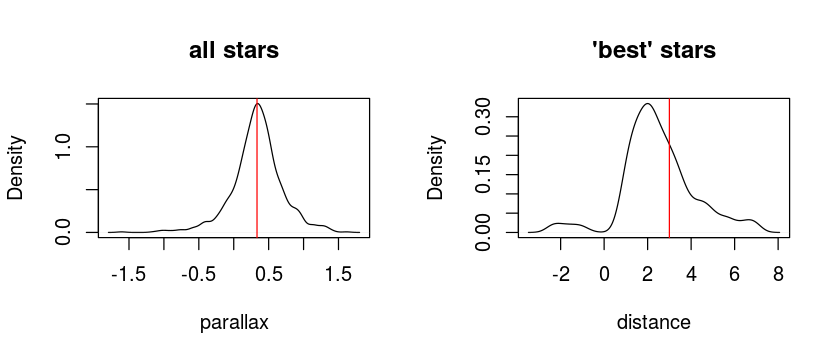

In [7]:
par(mfrow=c(1,2)); options(repr.plot.width=7, repr.plot.height=3)
plot(density(parallax),xlab="parallax",main="all stars"); abline(v=1/popdist,col="red")
plot(density(distance_indiv[best]),xlab="distance",main="'best' stars"); abline(v=popdist,col="red")


Note that the problem will be the same, even if potentially reduced, with other more sophisticated distance indicators than $\frac{1}{\varpi}$ such as those presented in the [Tutorial on Individual Distances](Tutorial_IndividualDistances.ipynb): your errors are Gaussian only in the parallax space. 

## 2. Staying in parallax space

In order to work with standard statistical tools that work with the Gaussian error hypothesis, one should work in parallax space. 

The inverse of the mean of the parallax is not adapted neither as the data are not heteroscedast (they have different variance). 

The weighted-mean of the parallaxes provides the un-biased distance to your stellar group. Indeed the maximum of the likelihood $\mathcal{L}$ 

$\mathcal{L} = \prod_i P(\varpi_i|\varpi_0) = \prod_i \frac{1}{\sigma_i \sqrt{2\pi}} e^{-\frac{(\varpi_i-\varpi_0)^2}{2\sigma_i^2}}$

is for $\frac{\delta \log \mathcal{L}}{\delta \varpi} = 0$, e.g. with $w_i = \frac{1}{\sigma_i^2}$ : $\hat{\varpi} = \frac{\sum_i w_i \varpi_i}{\sum_i w_i}$

In [8]:
w <- 1/parallax_error**2
moy <- sum(parallax*w)/sum(w)
emoy <- 1./sqrt(sum(w))
cat("Distance from the weighted mean of the parallax",1/moy,"+/-",emoy/moy**2,"\n")

Distance from the weighted mean of the parallax 2.898127 +/- 0.06494315 


Don't forget to indicate the systematic Gaia parallax zero point (global or local) effect on your estimate!